In [1]:
from scipy.io import wavfile
from sklearn.utils import resample
import numpy as np
import librosa

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


file_dir: /content/drive/MyDrive/KETI_MULTIMODAL_0000000517
file_id: KETI_MULTIMODAL_0000000517.mp4


<ipython-input-15-9152f3cd155a>:15: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4, sr=16000)


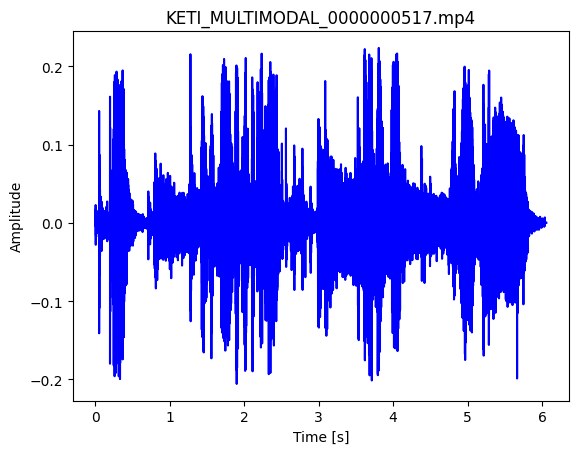

<ipython-input-15-9152f3cd155a>:26: UserWarning: PySoundFile failed. Trying audioread instead.
  t, tt = librosa.load(mp4, sr = 44100, duration = 10)
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


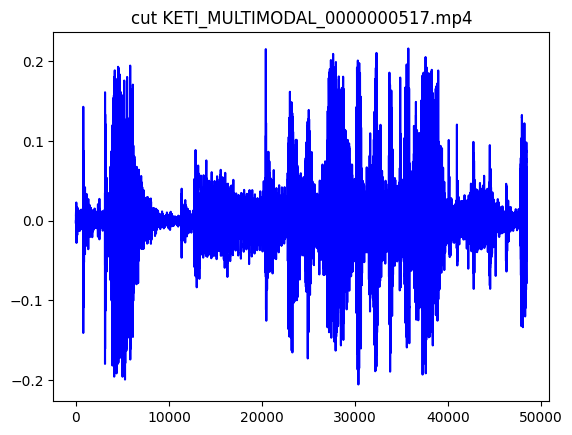

In [15]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import IPython.display
import soundfile as sf

mp4 = '/content/drive/MyDrive/KETI_MULTIMODAL_0000000517/KETI_MULTIMODAL_0000000517.mp4'
(file_dir, file_id) = os.path.split(mp4)
print("file_dir:", file_dir)
print("file_id:", file_id)

# original
y, sr = librosa.load(mp4, sr=16000)
time = np.linspace(0, len(y)/sr, len(y)) # time axis
fig, ax1 = plt.subplots() # plot
ax1.plot(time, y, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title(file_id) # 제목
plt.savefig(file_id+'.png')
plt.show()
# librosa.output.write_wav('original.mp4', y, sr) # original wav to save mp3 file

t, tt = librosa.load(mp4, sr = 44100, duration = 10)
IPython.display.Audio(data = t, rate = tt)

# cut half and save
half = len(y)/2
y2 = y[:round(half)]
time2 = np.linspace(0, half, len(y2))
fig2, ax2 = plt.subplots()
ax2.plot(time2, y2, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title('cut '+file_id)
plt.savefig('cut_half '+file_id+'.png')
plt.show()

# trg_audio_path = ''
sf.write('cut_file', y2, sr, format = 'WAV')

# librosa.output.write_wav('cut_file.mp4', y2, sr) # save half-cut file

In [13]:
t2, tt2 = librosa.load('/content/cut_file', sr = 44100, duration = 10)
IPython.display.Audio(data = t2, rate = tt2)